In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [50]:
### temas
sns.set_theme()
#sns.axes_style("darkgrid")

In [54]:
sns.set_context("paper")
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [82]:
### datasets cargados:
tips = sns.load_dataset("tips") ## Descripción de propinas en un restaurante
penguins = sns.load_dataset("penguins")
flights = sns.load_dataset('flights')
titanic = sns.load_dataset('titanic')
iris = sns.load_dataset('iris')

In [56]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [65]:
tips.corr() ## matriz de correlaciones

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


/Users/v/opt/miniconda3/envs/jupyter/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

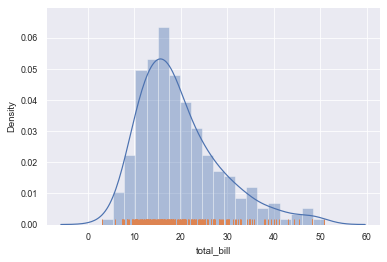

In [57]:
## Distplot univariada
sns.distplot(tips['total_bill'],kde=True,bins=20)
sns.rugplot(tips['total_bill'])

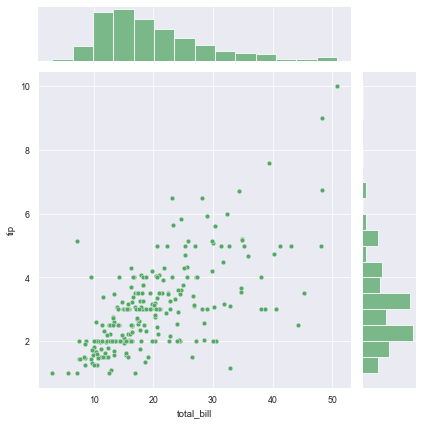

In [63]:
### Joint plot (Bivariado)
# scatter, reg, resid,kde,hex
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter', color = 'g')

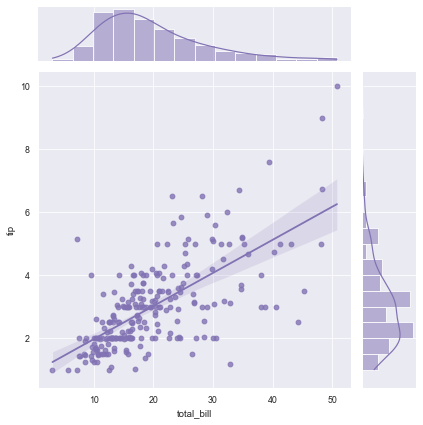

In [62]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg', color = 'm')

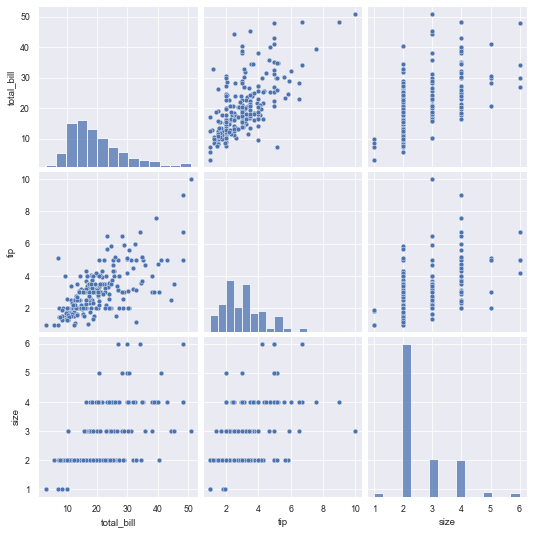

In [61]:
## Pairplot
sns.pairplot(tips)

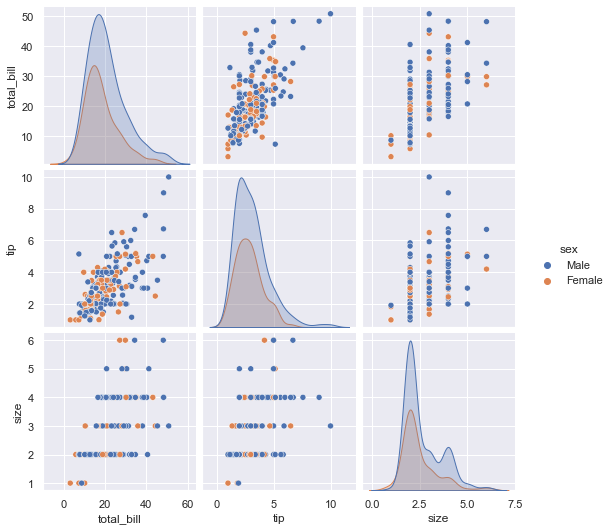

In [16]:
sns.pairplot(tips, hue = 'sex')

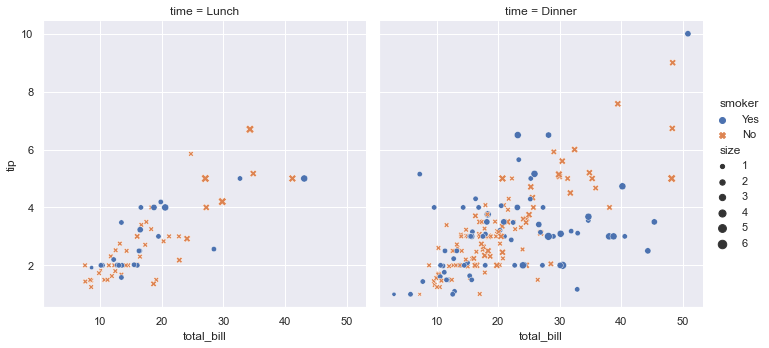

In [18]:
sns.relplot(data=tips,x="total_bill", y="tip", col="time",hue="smoker", style="smoker", size="size")

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

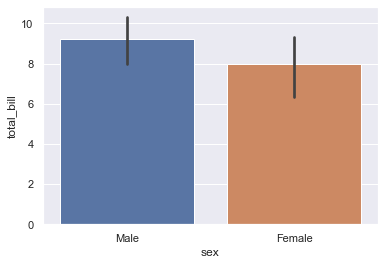

In [23]:
## Barplot (categorical data)
sns.barplot(x='sex',y='total_bill',data=tips, estimator = np.std)
# estimator default: mean

<AxesSubplot:xlabel='sex', ylabel='count'>

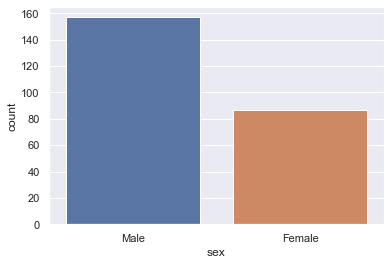

In [25]:
## Countplot (cuenta las ocurrencias)
sns.countplot(x = 'sex', data = tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

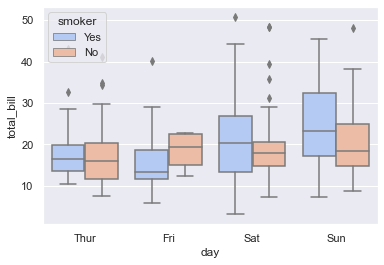

In [32]:
## Boxplot (shows the quartiles of the dataset)
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm")

<AxesSubplot:>

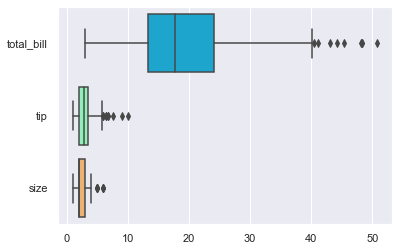

In [33]:
sns.boxplot(data=tips,palette='rainbow',orient='h')

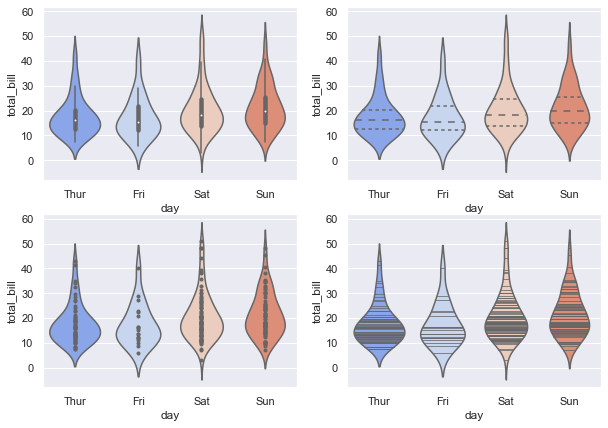

In [40]:
## Violinplot
# Combina la box plot  y la de la estimación de densidad kernel
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(10, 7)
sns.violinplot(x = "day", y = "total_bill", data = tips, kind = "violin", inner = "box", ax = ax[0, 0],palette="coolwarm");
sns.violinplot(x = "day", y = "total_bill", data = tips, kind = "violin", inner = "quartile", ax = ax[0, 1],palette="coolwarm");
sns.violinplot(x = "day", y = "total_bill", data = tips, kind = "violin", inner = "point", ax = ax[1, 0],palette="coolwarm");
sns.violinplot(x = "day", y = "total_bill", data = tips, kind = "violin", inner = "stick", ax = ax[1, 1],palette="coolwarm");

<AxesSubplot:xlabel='day', ylabel='total_bill'>

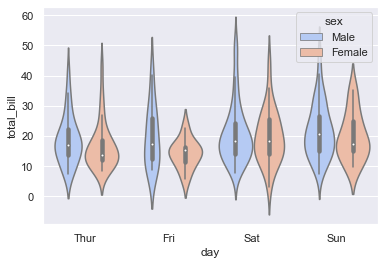

In [37]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',palette="coolwarm")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

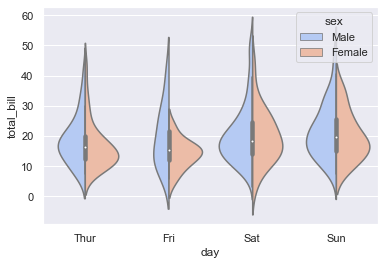

In [38]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette="coolwarm")

/Users/v/opt/miniconda3/envs/jupyter/lib/python3.8/site-packages/seaborn/categorical.py:2805: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='day', ylabel='total_bill'>

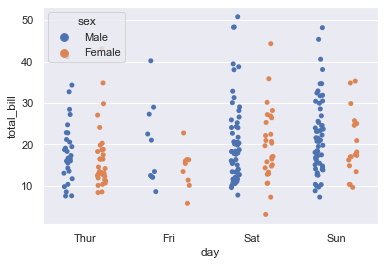

In [44]:
## Stripplot (scatterplot where one variable is categorical)
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True, hue = 'sex', split=True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

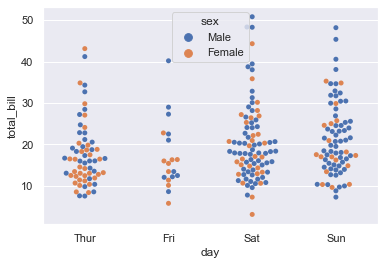

In [46]:
## Swarmplot
sns.swarmplot(x="day", y="total_bill", data=tips, hue='sex')

<AxesSubplot:xlabel='tip', ylabel='day'>

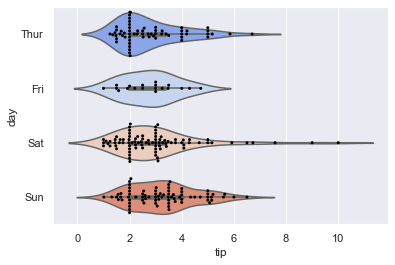

In [48]:
## Juntas:
sns.violinplot(x="tip", y="day", data=tips,palette='coolwarm')
sns.swarmplot(x="tip", y="day", data=tips,color='black',size=3)

<AxesSubplot:>

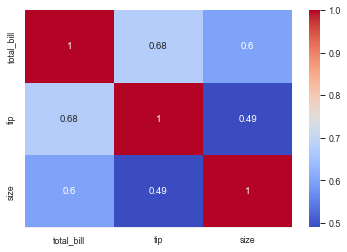

In [69]:
## Heatmap
sns.heatmap(tips.corr(), cmap='coolwarm', annot=True)

<AxesSubplot:xlabel='year', ylabel='month'>

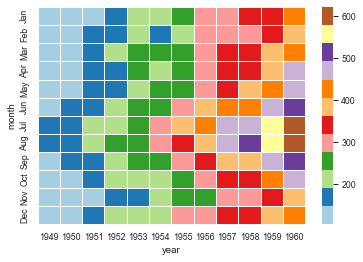

In [77]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights, cmap = "Paired",linecolor='white',linewidths=1)

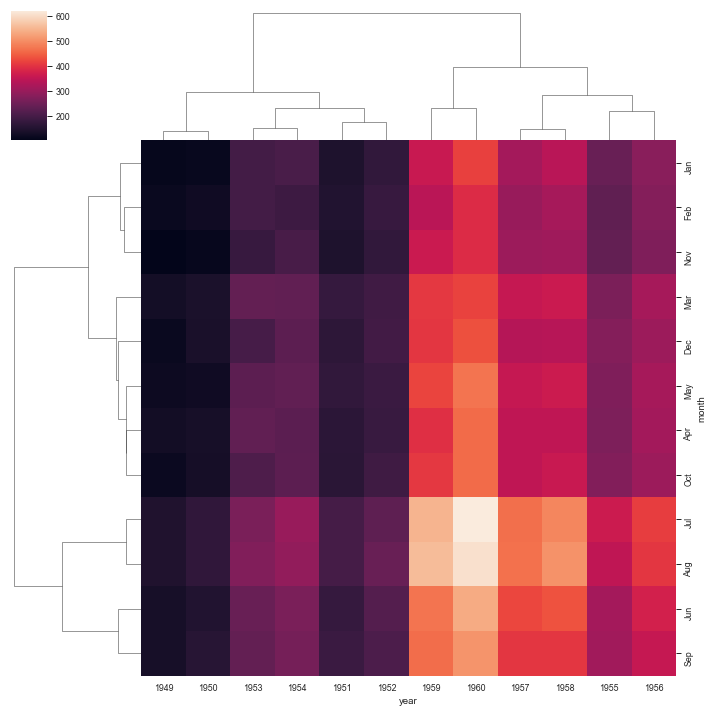

In [78]:
## Clustermap
# Agrupación jerárquica, pierde el orden y se agrupan por similitud
sns.clustermap(pvflights)

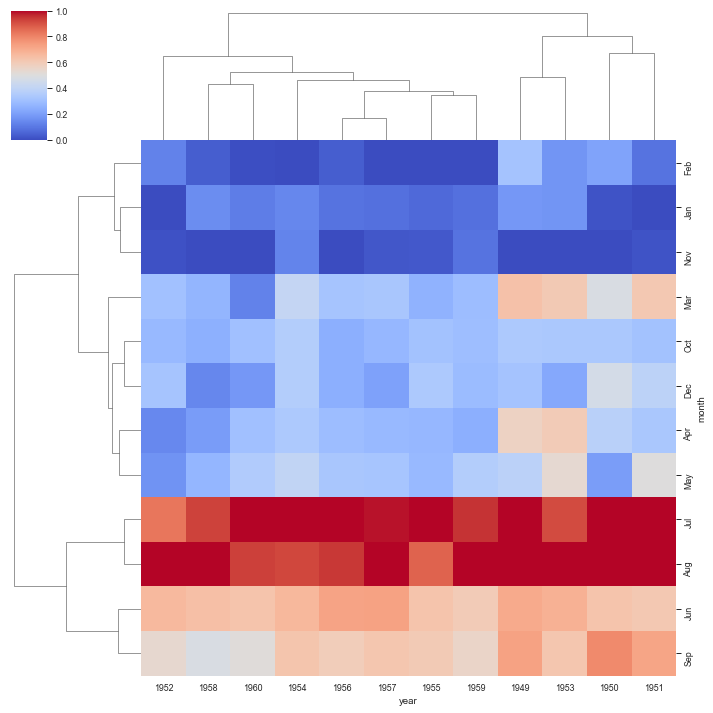

In [79]:
sns.clustermap(pvflights,cmap='coolwarm',standard_scale=1)

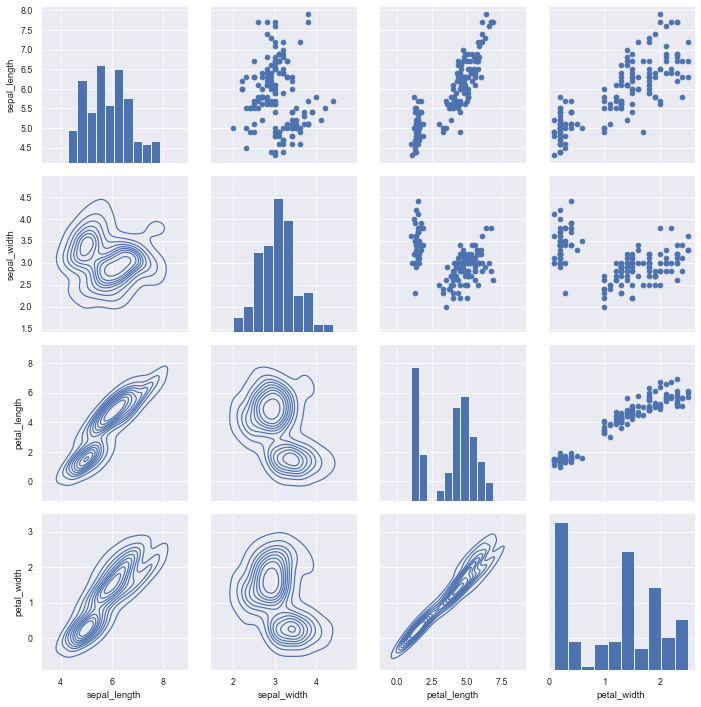

In [83]:
## Construcciones:
# Map to upper,lower, and diagonal
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

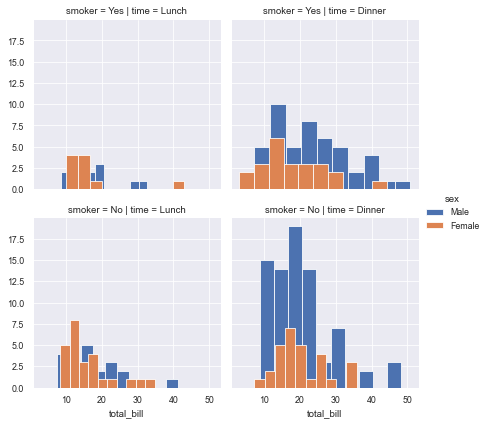

In [86]:
g = sns.FacetGrid(tips, col="time",  row="smoker", hue ='sex')
g = g.map(plt.hist, "total_bill").add_legend()

/Users/v/opt/miniconda3/envs/jupyter/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/v/opt/miniconda3/envs/jupyter/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/v/opt/miniconda3/envs/jupyter/lib/python3.8/site-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings

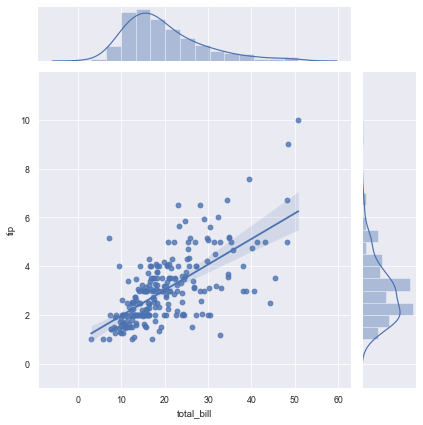

In [87]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.distplot)

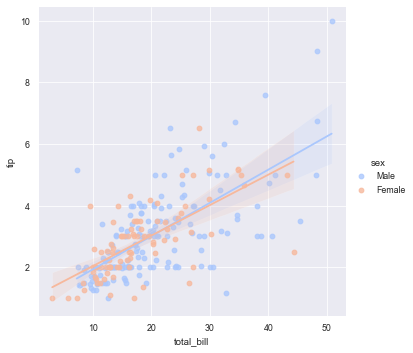

In [90]:
## Regression Plot
sns.lmplot(x='total_bill',y='tip',data=tips, hue='sex', palette = 'coolwarm')

/Users/v/opt/miniconda3/envs/jupyter/lib/python3.8/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


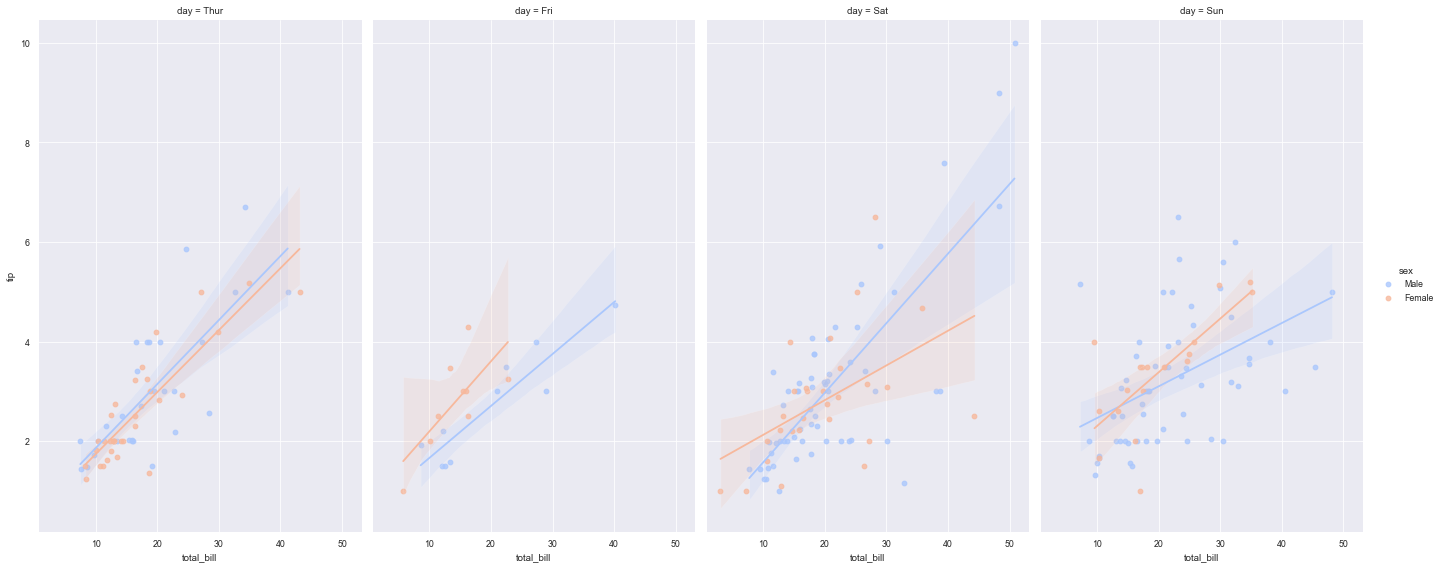

In [93]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm', aspect =0.6, size=8)

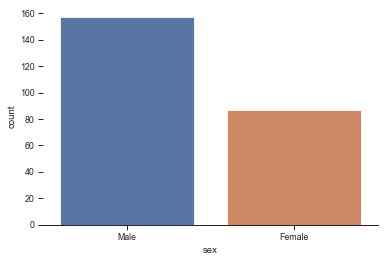

In [95]:
## Un poco de estilo
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)
sns.despine(left=True)

<AxesSubplot:xlabel='sex', ylabel='count'>

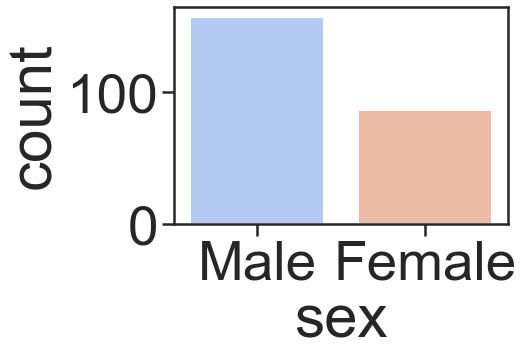

In [99]:
sns.set_context('poster',font_scale=2.5)
sns.countplot(x='sex',data=tips,palette='coolwarm')